참고교제 : 딥러닝 입문 with 텐서플로우 2.x (조휘용 지음, 로드북)

# Keras란? 
누구나 쉽게 사용하고 접할 수 있도록 파이썬으로 설계된 머신러닝 라이브러리 <br>
 <br>

* 특징 
  - 단순성 및 간결성 (Simplicity)
  - 유연성 (Easy extensibility)
  - 모듈화 (Modularity)
  - 파이썬 기반 (Python base)

* 단계 📍
  1. Data Preparing, Preprocessing 
  2. Model (Sequential, Funcional API)
  3. Compile (loss, optimizer)
  4. fit(), evaluate(),predict()

* Model  - Sequential 클래스 또는 함수형 API를 사용해 모델 정의

In [1]:
# sequential - 더 많이 사용함 
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
# 함수형 API 

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs= input_tensor, outputs= output_tensor)

* Compile  - 컴파일 단계에서 학습과정이 설정 
  - 모델이 사용할 optimizer, loss function 
  - 훈련하는 동안 모니터링하기 위해 필요한 측정지표를 지정

In [22]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


* 학습 - 입력데이터의 넘파이 배열을 모델의 fit( ) 메서드에 전달함으로써 '학습'

In [ ]:
model.fit(input_tensor, target_tensor, barch_size=128, epochs=10)

# 실습) 영화리뷰 분류 - 이진 분류 🎬
IMDB 데이터셋은 keras에 포함되어 있음 (전처리가 되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음) ➡️ 각 숫자는 사전에 있는 <u>고유한단어</u> 를 나타냄 

- 리뷰 텍스트를 기반으로 영화리뷰를 긍정 과 부정으로 분류
- 인터넷 영화 데이터 베이스에서 가져온 양극단의 리뷰 5만개로 이루어 진 IMDB데이터 셋을 사용 
- Train data : 25,000개
- Test data : 25,000개 
- 각각 50%는 긍정 , 50%는 부정 리뷰로 구성

In [1]:
# 데이터셋 로드 
# num_words= 10000 매개변수는 훈련데이터에서 가장 자주 나타나는 단어 1만개만 사용하겠다는 의미 
from keras.datasets import imdb 
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

In [6]:
# train 데이터 확인 
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
print(train_labels[0])

1


In [8]:
print(max([max(sequence) for sequence in train_data]))

9999


In [5]:
# 사전에 저장된 단어, 숫자 -> 문자로 출력 
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

* 신경망에 숫자 리스트를 주입할 수 없음
  - 리스트를 텐서로 변환
  1. 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고(samples, sequence_length)크기의 정수 텐서로 변환 
    - 정수 텐서를 다룰 수 있는 층(Embedding)을 신경망의 첫번째 층으로 사용 
  2. 리스트를 원-핫 인코딩(one-hot encoding)하영 0과 1의 벡터로 변환 
    - 부동 소수 벡터데이터를 다룰 수 있는 Dense층을 신경망의 첫번째 층으로 사용

In [2]:
# 정수 시퀀서를 이진 행렬로 인코딩 
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 숫자가 있는 부분은 1, 없는 부분은 0
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [3]:
# 부동 소수점으로 변환 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

* 신경망 모델 만들기 
  - 입력 데이터가 벡터, 레이블은 스칼라(0 또는 1)
  - relu 활성화 함수를 사용한 완전연결층(Dense(16, activation ='relu'))을 그냥 쌓은 것 
  - 매개변수 15은 은닉유닛(hidden unit)의 개수 
    - 가중치 행렬 W의 크기가 (input_dimension, 16)
    - 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영 
  - 표현 공간의 차원 : 신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도
<br>

* ⚠️ 표현공간을 더 고차원으로 만들면 신경망이 더 복잡한 표현을 학습 할 수 있으나, 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있음

* Dense층을 쌓을 때 두가지 중요한 구조성 결정이 필요❗️
   - 얼마나 많은 층을 사용 
   - 각 층에 얼마나 많은 은닉유닛을 사용 

In [4]:
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# keras가 첫번째 층 이후 input shape를 자동으로 설정함 
model.add(layers.Dense(16, activation='relu'))
# 출력 값이 확률이므로, sigmoid를 사용
# 이진 분류임으로 0 또는 1값을 반환해야함으로 마지막 units은 1로 FIX
model.add(layers.Dense(1, activation='sigmoid'))

* 손실함수와 옵티마이저를 선택 
  - 이진분류 문제이며, 신경망의 출력이 '확률'이므로 네트워크 마지막에 '시그모이드 활성화 함수'를 사용한 하느이 유닛으로 된 층을 사용 
    - 'binary crossentropy 손실함수' 적합 
    - MSE 도 사용할 수 있음 
    - **확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택** ✅

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 같은의미, 표현이 다른 공식(1)
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# 같은의미, 표현이 다른공식 공식(2)
from keras import losses
from keras import metrics 

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

* 훈련 검증 
  - 훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 원본 훈련데이터에서 10000개의 샘플을 떼어 검증 세트를 만듬 

In [5]:
# train, validation을 분리 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴
# 동시에 1만개 샘플에 대해 손실과 정확도를 측정 
history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5330 - acc: 0.7707 - val_loss: 0.4073 - val_acc: 0.8717
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3289 - acc: 0.8982 - val_loss: 0.3158 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2355 - acc: 0.9270 - val_loss: 0.2817 - val_acc: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1839 - acc: 0.9414 - val_loss: 0.2731 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1464 - acc: 0.9555 - val_loss: 0.2878 - val_acc: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1221 - acc: 0.9623 - val_loss: 0.2941 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1008 - acc: 0.9705 - val_loss: 0.3065 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0808 - a

In [7]:
# history = model.fit()
# 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있음 
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

* 표를 그려서 loss 확인해보기 

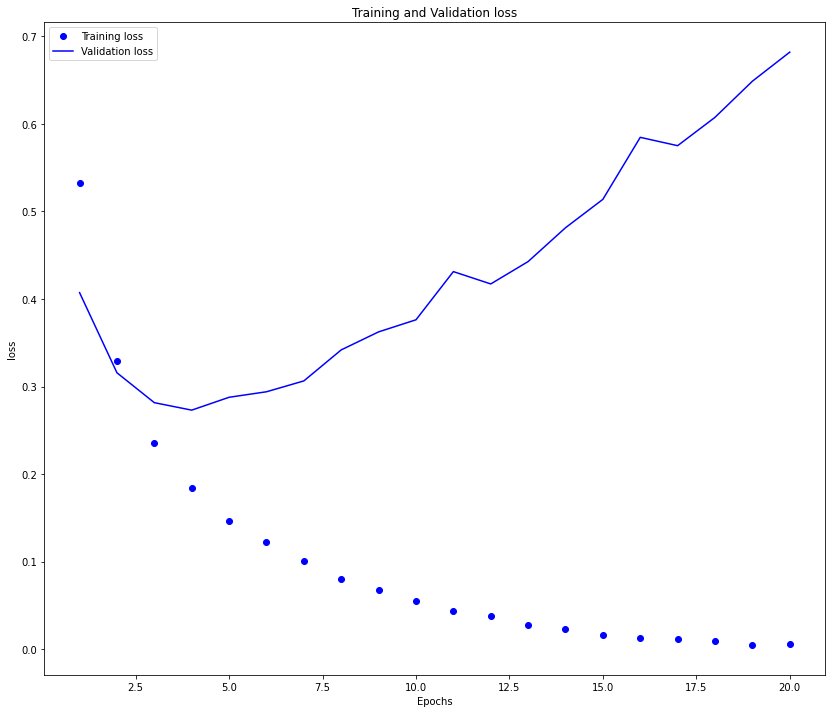

In [8]:
# Train data에 최적화된 상태라 overfitting이 발생함 
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(14,12))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

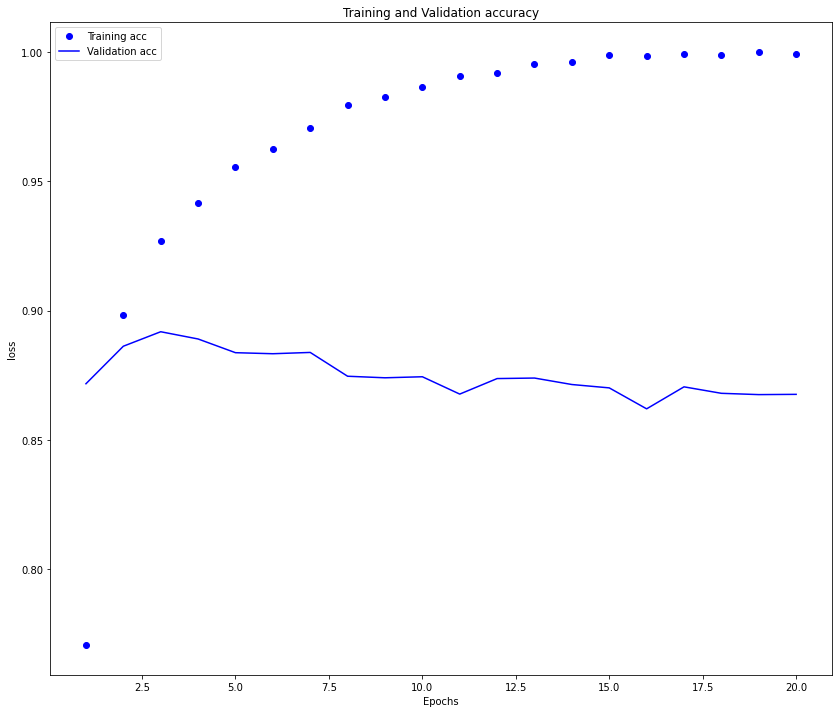

In [9]:
# accuracy 확인하기 
# 4번째 epoch 에서 역전됨 
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure(figsize=(14,12))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

* 과대적합을 방지하기 위해 세번째 에포크 이후에 훈련을 중지할 수 있음 

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4577 - accuracy: 0.8179
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2610 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2027 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3148 - accuracy: 0.8752
[0.3147919178009033, 0.8751599788665771]


In [11]:
# 훈련된 새로운 데이터에 대해 예측 
model.predict(x_test)

array([[0.2741062 ],
       [0.9988246 ],
       [0.98190385],
       ...,
       [0.20400572],
       [0.11658061],
       [0.84246314]], dtype=float32)

### 추가실험 1) 
- 1개 또는 3개의 은닉층을 사용 
  - 결과 : 1개, 3개 모두 더 높은 값을 나타냄 

In [41]:
# 1개 은닉층 사용
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4351 - accuracy: 0.8282
Epoch 2/4
49/49 [==============================] - 2s 49ms/step - loss: 0.2676 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2119 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2883 - accuracy: 0.8836
[0.2882618308067322, 0.8836399912834167]


### 추가실험 2)
  - 층의 은닉 유닛을 추가하거나 줄여보기 
    - 32개 또는 64개
      - 기존의 결과보다 정확성이 떨어짐 

In [42]:
# unit 32개
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4304 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2378 - accuracy: 0.9133
Epoch 3/4
49/49 [==============================] - 2s 35ms/step - loss: 0.1899 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3635 - accuracy: 0.8624
[0.36346566677093506, 0.8624399900436401]


### 추가실험 3) 
  - binary_crossentropy 대신 mse 사용 
    - 결과 : mse 사용하면 왜 더 높지?

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1436 - accuracy: 0.8265
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0785 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0588 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0896 - accuracy: 0.8789
[0.08962143212556839, 0.8789200186729431]


### 추가 실험 4) 
- Activation 함수로 relu 대신 tanh 사용
  - 결과 : 기존보다 정확성이 떨어짐 

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4463 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2443 - accuracy: 0.9146
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1809 - accuracy: 0.9347
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3260 - accuracy: 0.8762
[0.3259769082069397, 0.8761600255966187]
